In [37]:
import numpy as np
import pandas as pd
import os
from classifier import GenreClassifier
import math

In [2]:
filepath = 'giantNP.csv'
ydata = pd.read_csv('project.csv')

In [8]:
topN = 50
numGenres = len(list(set(ydata['Genre'])))

In [73]:
set(ydata['Genre'])

{'Adventure',
 'Biography',
 'Essays',
 'Fantasy',
 'Fiction',
 'Historical Fiction',
 'Horror',
 'Mystery',
 'Romance'}

In [4]:
df = pd.read_csv('giantNP.csv')
df.head(5)

,0,0.067451697482335,0.03583371428749047,0.012647193277937813,0.005796630252388164,0.020366615060426183,0.0560058090393904,0.00844966995519314,0.0024042822890722004,0.0018731488429487542,...,0.0.369161,0.0.369162,0.0.369163,0.0.369164,0.0.369165,0.0.369166,0.0.369167,0.0.369168,0.0.369169,0.0.369170
0,1,0.082733,0.356784,0.124099,0.056879,0.031554,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.074409,0.027058,0.009550,0.004377,0.025092,0.000622,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.072819,0.011313,0.003824,0.001753,0.016854,0.000249,0.000426,0.020356,0.000566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.033304,0.008890,0.003184,0.001061,0.008232,0.000415,0.000000,0.000202,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.034991,0.027668,0.009765,0.004476,0.005380,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
df.shape

(40, 374928)

In [119]:
df.drop('0', axis=1, inplace=True)

In [121]:
df.head(5)

,0.067451697482335,0.03583371428749047,0.012647193277937813,0.005796630252388164,0.020366615060426183,0.0560058090393904,0.00844966995519314,0.0024042822890722004,0.0018731488429487542,0.015282025210841524,...,0.0.369161,0.0.369162,0.0.369163,0.0.369164,0.0.369165,0.0.369166,0.0.369167,0.0.369168,0.0.369169,0.0.369170
1,0.074409,0.027058,0.009550,0.004377,0.025092,0.000622,0.000000,0.000000,0.000000,0.015519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.072819,0.011313,0.003824,0.001753,0.016854,0.000249,0.000426,0.020356,0.000566,0.009560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033304,0.008890,0.003184,0.001061,0.008232,0.000415,0.000000,0.000202,0.000000,0.014463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034991,0.027668,0.009765,0.004476,0.005380,0.000000,0.000000,0.000000,0.000000,0.019937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.036345,0.020945,0.007392,0.003388,0.007518,0.001444,0.000823,0.000000,0.000000,0.024641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
tfidf = df.to_numpy()
tfidf

array([[0.07440922, 0.0270579 , 0.00954985, ..., 0.        , 0.        ,
        0.        ],
       [0.07281866, 0.01131318, 0.00382417, ..., 0.        , 0.        ,
        0.        ],
       [0.03330357, 0.0088898 , 0.0031844 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12279   , 0.02620518, 0.00898463, ..., 0.        , 0.        ,
        0.        ],
       [0.07915779, 0.00387548, 0.0010691 , ..., 0.        , 0.        ,
        0.        ],
       [0.04737286, 0.26055074, 0.08290251, ..., 0.01773266, 0.03546532,
        0.01773266]])

In [123]:
labels = ydata['Genre'].to_numpy()

In [124]:
prepro = np.argsort(tfidf, axis=1)[:,:100]
prepro.shape

(40, 100)

In [125]:
prepro

array([[187463, 249955, 249954, ..., 250042, 250041, 250040],
       [187463, 249955, 249954, ..., 250042, 250041, 250040],
       [187463, 249955, 249954, ..., 250042, 250041, 250040],
       ...,
       [187463, 246134, 246133, ..., 246218, 246226, 246217],
       [187463, 233875, 233874, ..., 233950, 233949, 233948],
       [187463, 249345, 249344, ..., 249431, 249430, 249429]], dtype=int64)

In [86]:
os.system("python classifier.py")

# voc = ['youdidntincludethevocab']*prepro.shape[1]

0

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [126]:
model = KMeans(init="random", n_clusters=5, random_state=42).fit(prepro)

In [127]:
model.cluster_centers_

array([[187463.        , 266744.        , 266743.        ,
        266742.        , 266741.        , 266740.        ,
        266739.        , 266738.        , 266737.        ,
        266736.        , 266735.        , 266734.        ,
        266733.        , 266732.        , 266731.        ,
        266730.        , 266745.        , 266746.        ,
        266747.        , 266748.        , 266764.        ,
        266763.        , 266762.        , 266761.        ,
        266760.        , 266759.        , 266758.        ,
        266729.        , 266757.        , 266755.        ,
        266754.        , 266753.        , 266752.        ,
        266751.        , 266750.        , 266749.        ,
        266756.        , 266728.        , 266727.        ,
        266726.        , 266705.        , 266704.        ,
        266703.        , 266702.        , 266701.        ,
        266700.        , 266699.        , 266706.        ,
        266698.        , 266696.        , 266695.       

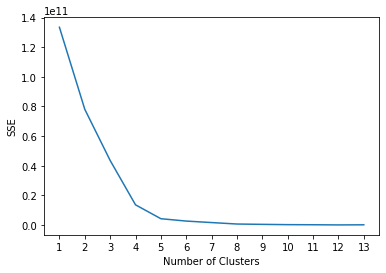

In [128]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 14):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(prepro)
   ...:     sse.append(kmeans.inertia_)
    
plt.plot(range(1, 14), sse)
plt.xticks(range(1, 14))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

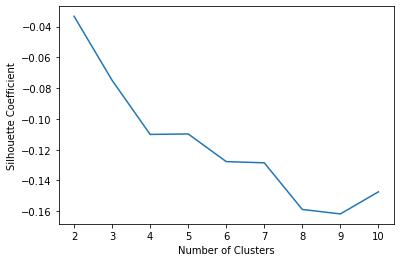

In [129]:
silhouette_coefficients = []
   ...:
   ...: # Notice you start at 2 clusters for silhouette coefficient
   ...: for k in range(2, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(prepro)
   ...:     score = silhouette_score(df, kmeans.labels_)
   ...:     silhouette_coefficients.append(score)

 ...: plt.plot(range(2, 11), silhouette_coefficients)
   ...: plt.xticks(range(2, 11))
   ...: plt.xlabel("Number of Clusters")
   ...: plt.ylabel("Silhouette Coefficient")
   ...: plt.show()

In [130]:
np.savetxt("cluster_centroids.csv", model.cluster_centers_, delimiter=",")

In [134]:
centroids = pd.read_csv('cluster_centroids.csv', header=None)
centroids.shape

(5, 100)

In [133]:
data = pd.DataFrame(prepro)
data.shape

(40, 100)

In [135]:
assigned_clusters = []


for index_novel, each_row_novel in data.iterrows():
    ec_dist = []
    for index_centroid, each_row_centroid in centroids.iterrows():
        eculidean_dist = math.dist(each_row_novel, each_row_centroid)
        ec_dist.append(eculidean_dist)
    assigned_clusters.append([index_novel, ec_dist.index(min(ec_dist))])

In [140]:
novel_names = pd.read_csv('project.csv')
novel_names.drop(0, axis=0, inplace=True)

In [141]:
novel_names['predicted_cluster'] = [i[1] for i in assigned_clusters]

In [142]:
novel_names

,Novel,Genre,predicted_cluster
1,A Modest Proposal by Jonathan Swift,Fiction,1
2,A Room with a View by E. M. Forster,Romance,1
3,A Tale of Two Cities by Charles Dicke,Historical Fiction,1
4,Adventures of Huckleberry Finn by Mark Twain,Historical Fiction,1
5,Alice's Adventures in Wonderland by Lewis Carroll,Fantasy,1
6,Cranford by Elizabeth Cleghorn Gaske,Fiction,1
7,Crime and Punishment by Fyodor Dos,Historical Fiction,1
8,Dracula by Bram Stoker,Horror,1
9,"Frankenstein; Or, The Modern Prometh",Horror,1
10,Great Expectations by Charles Dicken,Romance,1


In [145]:
print(novel_names[novel_names['predicted_cluster'] == 3])

                                      Novel    Genre  predicted_cluster
25  The Count of Monte Cristo, Illustrated   Romance                  3
26      The Enchanted April by Elizabeth Vo  Romance                  3
29    The Hound of the Baskervilles by Arth  Mystery                  3
30                       The Iliad by Homer  Fantasy                  3
32        The Prince by Niccolò Machiavelli   Essays                  3
33    The Scarlet Letter by Nathaniel Hawth  Romance                  3
36      The Yellow Wallpaper by Charlotte P  Fiction                  3
38                   Ulysses by James Joyce  Fantasy                  3
